# Example Usage

Examples of how to use the API.

In [1]:
from wrc_rallydj.wrc_api import WRCAPIClient, time_to_seconds

# The cacheing is tricky:
# - we want to be able to force updates for live stages etc
# There is internal state in the class, which stores
# the last requested data unless we force an update
# wrc = WRCAPIClient(use_cache=True, backend="sqlite", expire_after=600)
wrc = WRCAPIClient(use_cache=True, backend="memory", expire_after=600)

# wrc.initialise(year=2024)
# wrc.seasonId
# Current year, latest race by default
wrc.initialise()

In [2]:
#Versions are:

#f"{mpl.__version__, pd.__version__, sns.__version__, np.__version__}"
#'3.5.2', '2.2.0', '0.13.2', '1.26.4
2025 in jj.index

NameError: name 'jj' is not defined

In [3]:
import json
rallyId=str(582)
year="2025"
def getSplitDists():
    with open("patches.json", 'r') as file:
        patches_json = json.load(file)
        try:
            splits = patches_json["split_distances"][year][rallyId]
            splits = pd.DataFrame.from_dict(splits, orient="index")
            splits.columns = [f"round{i}" for i in range(1, splits.shape[1]+1)]
        except:
            splits = pd.DataFrame()
    return splits

pd.DataFrame(getSplitDists().loc["SS1"])

NameError: name 'pd' is not defined

In [4]:
wrc.getFullCalendar().head()

,id,guid,title,location,startDate,endDate,eventId,rallyId,description,round,...,uid,seriesUid,releaseYear,availableOn,availableTill,startDateLocal,endDateLocal,finishDate,championship,championshipLogo
0,K1Lg,WRC_2025_01,Rallye Monte-Carlo,Monaco,1737558000000,1737898200000,534,582,The most unpredictable rally of the year. Rela...,1,...,K1Lg,WRC_2025_01,2025,1737558000000,1737898200000,2025-01-22T16:00:00+01:00,2025-01-26T14:30:00+01:00,1737898200000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...
1,skC3,WRC_2025_02,WRC Rally Sweden,sweden,1739433600000,1739718000000,535,583,The WRC’s ultimate winter challenge. Watch in ...,2,...,skC3,WRC_2025_02,2025,1739433600000,1739718000000,2025-02-13T09:00:00+01:00,2025-02-16T16:00:00+01:00,1739718000000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...
2,G2NQ,WRC_2025_03,WRC Safari Rally Kenya,"Naivasha, Kenya",1742450400000,1742734800000,536,584,Held on the untamed terrains of Africa’s breat...,3,...,G2NQ,WRC_2025_03,2025,1742450400000,1742734800000,2025-03-20T09:00:00+03:00,2025-03-23T16:00:00+03:00,1742734800000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...
3,zhuM,WRC_2025_04,WRC Rally Islas Canarias,"Islas Canarias, Spain",1745478000000,1745762400000,538,586,Well-known to FIA European Rally Championship ...,4,...,zhuM,WRC_2025_04,2025,1745478000000,1745762400000,2025-04-24T09:00:00+02:00,2025-04-27T16:00:00+02:00,1745762400000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...
4,edGQ,WRC_2025_05,WRC Vodafone Rally de Portugal,"Matosinhos, Porto",1747296000000,1747580400000,540,588,Fast but technical gravel roads inland from Po...,5,...,edGQ,WRC_2025_05,2025,1747296000000,1747580400000,2025-05-15T09:00:00+01:00,2025-05-18T16:00:00+01:00,1747580400000,WRC,[{'url': 'https://wrc-static.enhance.diagnal.c...


In [5]:
wrc.seasonId, 

(34,)

In [6]:
df_stageDetails = wrc.getStageDetails()
df_stageDetails.head()

,id,STAGE,STAGE TYPE,stageId,eventId,STATUS,day,name,distance
0,ee55daa1-fd07-574f-835a-f39008081b95,SHD,shakedown,SHD,534,Complete,,Shakedown,NaN
1,5d822449-4aa8-578d-a4b5-11de9d6b5c8e,SS1,SpecialStage,8210,534,Completed,Thursday,SS1 Digne-les-Bains - Chaudon-Norante 1 (19.01km),19.01
2,395add0b-a1ac-5202-bb72-b247dc5fe024,SS2,SpecialStage,8211,534,Completed,Thursday,SS2 Faucon-du-Caire - Bréziers (21.18km),21.18
3,1b9a8d9a-391b-5805-aeb2-e169b2be30a5,SS3,SpecialStage,8212,534,Interrupted,Thursday,SS3 Avançon - Notre-Dame du Laus 1 (13.97km),13.97
4,bdbff681-88c6-5603-86e1-ea272895019f,SS4,SpecialStage,8213,534,Completed,Friday,SS4 Saint-Maurice - Aubessagne 1 (18.68km),18.68


In [7]:
wrc.getItinerary()

,stage,eventId,stageId,distance,timingPrecision,firstCarDueDateTime,firstCarDueDateTimeMs,controlPenalties,status,type,location,targetDuration,targetDurationMs,id,order,date
0,TC0,534,null,0 km,Minute,14:30,2025-01-23T14:30:00+01:00,All,Completed,TimeControl,Monaco,null,null,1486.0,NaN,NaN
1,TC0A,534,null,168.83 km,Minute,17:15,2025-01-23T17:15:00+01:00,All,Completed,TimeControl,Digne-les-Bains - Tyre Fitting Zone IN,02:45:00,9900000,1486.0,NaN,NaN
2,TC0B,534,null,0.1 km,Minute,17:30,2025-01-23T17:30:00+01:00,All,Completed,TimeControl,Digne-les-Bains - Tyre Fitting Zone OUT,00:15:00,900000,1486.0,NaN,NaN
3,TC1,534,5d822449-4aa8-578d-a4b5-11de9d6b5c8e,4.28 km,Minute,18:02,2025-01-23T18:02:00+01:00,All,Completed,TimeControl,Digne-les-Bains,00:32:00,1920000,1486.0,NaN,NaN
4,SS1,534,5d822449-4aa8-578d-a4b5-11de9d6b5c8e,19.01 km,Minute,18:05,2025-01-23T18:05:00+01:00,None,Completed,StageStart,Digne-les-Bains - Chaudon-Norante 1,00:03:00,180000,1486.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,TC18,534,19513ad9-1929-5f77-a4c5-004587652565,6.15 km,Minute,12:12,2025-01-26T12:12:00+01:00,All,ToRun,TimeControl,La Bollène-Vésubie,00:20:00,1200000,1489.0,4.0,Sunday 26th January
11,SS18,534,19513ad9-1929-5f77-a4c5-004587652565,17.92 km,Minute,12:15,2025-01-26T12:15:00+01:00,None,ToRun,StageStart,La Bollène-Vésubie - Peïra-Cava,00:03:00,180000,1489.0,4.0,Sunday 26th January
12,SF18,534,19513ad9-1929-5f77-a4c5-004587652565,,Thousandth,,,None,ToRun,FlyingFinish,La Bollène-Vésubie - Peïra-Cava,null,null,1489.0,4.0,Sunday 26th January
13,TC18A,534,null,52.65 km,Minute,14:05,2025-01-26T14:05:00+01:00,Late,ToRun,TimeControl,Monaco - Technical Zone IN,01:50:00,6600000,1489.0,4.0,Sunday 26th January


In [8]:
wrc.getStartlist()

,order,startDateTimeLocal,carNo,driverId,driverCountry,driverCountryImage,driver,coDriverId,coDriverCountry,coDriverCountryImage,coDriver,teamId,team/car,teamName,teamLogo,eligibility,groupClass,priority,date,id
0,1,Entrylist,#1,c99a2a26-bd03-5153-aaa7-684d3acb5491,Belgium,Flags/BEL.png,Thierry NEUVILLE,b1b98699-0332-528a-8a80-11eb538f1ded,Belgium,Flags/BEL.png,Martijn WYDAEGHE,b6692ea5-df92-5cad-a91c-20319a6fffd7,i20 N Rally1,Hyundai,teamLogo/hyundai.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c
1,2,Entrylist,#33,ae7329c9-79b3-5d96-886c-22cca6217764,United Kingdom of Great Britain and Northern I...,Flags/GBR.png,Elfyn EVANS,53e56691-fe7c-5271-9dc5-8960df28b221,United Kingdom of Great Britain and Northern I...,Flags/GBR.png,Scott MARTIN,be461a0c-d1fd-5052-a69c-3fd94f8cf5f6,GR Yaris Rally1,Toyota,teamLogo/toyota.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c
2,3,Entrylist,#8,6632e7ca-34bf-55b8-9cad-d060000fa794,Estonia,Flags/EST.png,Ott TÄNAK,00a8a5c3-f7ba-5086-86df-1a59b7da7e26,Estonia,Flags/EST.png,Martin JÄRVEOJA,b6692ea5-df92-5cad-a91c-20319a6fffd7,i20 N Rally1,Hyundai,teamLogo/hyundai.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c
3,4,Entrylist,#17,1cf9ade6-25b5-5586-8393-eacfeb943eae,France,Flags/FRA.png,Sébastien OGIER,867cd58f-3fe3-5290-9cc5-b21cb41c523c,France,Flags/FRA.png,Vincent LANDAIS,be461a0c-d1fd-5052-a69c-3fd94f8cf5f6,GR Yaris Rally1,Toyota,teamLogo/toyota.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c
4,5,Entrylist,#16,bf956e8a-5cad-5327-add0-26e0481ea508,France,Flags/FRA.png,Adrien FOURMAUX,8231e16a-f455-56fa-9b3c-dc3befa854cf,France,Flags/FRA.png,Alexandre CORIA,b6692ea5-df92-5cad-a91c-20319a6fffd7,i20 N Rally1,Hyundai,teamLogo/hyundai.png,M,RC1,P1,Entrylist,24c25e9d-7635-54c5-bc16-7fcf4bc7d60c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,2025-01-25T06:55:00+01:00,#72,cb449d32-af0b-5f31-856d-50d13a5cc7e3,France,Flags/FRA.png,Jérôme AYMARD,5afeb135-29dc-51e0-bd62-30b2562b61b8,France,Flags/FRA.png,Sandrine AYMARD,a72b2006-2ec2-547a-b2ce-b97ac1bee818,Clio RS,Renault,teamLogo/renault.png,,RC4,None,Saturday 2025-01-25,a2dc1b9d-4907-51c8-8694-e3211c000e22
61,62,2025-01-25T06:55:00+01:00,#70,34c66477-519b-549b-89b4-5e131347c17b,France,Flags/FRA.png,Christophe BERARD,9f3bdbf6-0524-5e18-8acb-a43499e6c6cb,France,Flags/FRA.png,Christophe BERNABO,812ed456-2d32-5136-ba7b-813aa9cd2cf0,A110,Alpine,teamLogo/alpine.png,,RGT,None,Saturday 2025-01-25,a2dc1b9d-4907-51c8-8694-e3211c000e22
62,63,2025-01-25T06:55:00+01:00,#53,0caa2fd4-9c44-52e6-b7d0-a6c5e9d4ab7d,Croatia IOC,Flags/CRO.png,Slaven ŠEKULJICA,66800773-efbd-53e8-8823-c216ccd47b43,Croatia IOC,Flags/CRO.png,Damir PETROVIĆ,887309d0-48be-5f83-ad3e-abf2a79a64a3,Fiesta Rally3,Ford,teamLogo/ford.png,WRC3,RC3,None,Saturday 2025-01-25,a2dc1b9d-4907-51c8-8694-e3211c000e22
63,64,2025-01-25T06:55:00+01:00,#75,c57651bd-e5a4-550e-9513-2cd84592e770,Monaco IOC,Flags/MON.png,Jean Paul PALMERO,fed9fc07-1e59-560d-9f99-69f7f8582f2f,Italy,Flags/ITA.png,Mattia PASTORINO,2a459380-709e-5fe4-ac2d-ae5733c73225,208 Rally4,Peugeot,teamLogo/peugeot.png,,RC4,None,Saturday 2025-01-25,a2dc1b9d-4907-51c8-8694-e3211c000e22


In [9]:
stageId = "SHD"
# wrc.getOverall(stageId="SS1", update=True)
wrc.getOverall(stageId="SS5")

,id,pos,carNo,driverId,driverCountry,driverCountryImage,driver,coDriverId,coDriverCountry,coDriverCountryImage,...,penaltyTime,time,totalTime,diffFirst,diffPrev,groupClass,championshipId,eventId,rallyId,stageId
0,c5fb3165-b623-5dae-b311-4401f980d669,1,#33,ae7329c9-79b3-5d96-886c-22cca6217764,United Kingdom of Great Britain and Northern I...,Flags/GBR.png,Elfyn EVANS,53e56691-fe7c-5271-9dc5-8960df28b221,United Kingdom of Great Britain and Northern I...,Flags/GBR.png,...,,44:58.6,44:58.6,,,RC1,289,534,582,8214
1,97b06fee-06f0-5615-a9dd-0fae2bc6f404,2,#1,c99a2a26-bd03-5153-aaa7-684d3acb5491,Belgium,Flags/BEL.png,Thierry NEUVILLE,b1b98699-0332-528a-8a80-11eb538f1ded,Belgium,Flags/BEL.png,...,,44:59.4,44:59.4,+0.8,+0.8,RC1,289,534,582,8214
2,69ebac10-6e23-578b-8e94-ee04c1b3f2aa,3,#17,1cf9ade6-25b5-5586-8393-eacfeb943eae,France,Flags/FRA.png,Sébastien OGIER,867cd58f-3fe3-5290-9cc5-b21cb41c523c,France,Flags/FRA.png,...,,45:02.6,45:02.6,+4.0,+3.2,RC1,289,534,582,8214
3,b14b2ba0-5016-5af8-9854-02c4efabe00c,4,#8,6632e7ca-34bf-55b8-9cad-d060000fa794,Estonia,Flags/EST.png,Ott TÄNAK,00a8a5c3-f7ba-5086-86df-1a59b7da7e26,Estonia,Flags/EST.png,...,,45:10.8,45:10.8,+12.2,+8.2,RC1,289,534,582,8214
4,d8162e00-0932-5504-9caf-1152c94c205a,5,#16,bf956e8a-5cad-5327-add0-26e0481ea508,France,Flags/FRA.png,Adrien FOURMAUX,8231e16a-f455-56fa-9b3c-dc3befa854cf,France,Flags/FRA.png,...,,45:15.2,45:15.2,+16.6,+4.4,RC1,289,534,582,8214
5,481b8e0f-70ce-51b5-8581-082378513f5d,6,#69,d8e4bbea-3af2-5486-9ad5-a445aaec573e,Finland,Flags/FIN.png,Kalle ROVANPERÄ,e4dd8a3f-00e9-59f7-9871-9337af6085d7,Finland,Flags/FIN.png,...,,45:21.0,45:21.0,+22.4,+5.8,RC1,289,534,582,8214
6,3dd910ce-cb1d-5231-b87e-c00c14b68f9e,7,#13,c718f17c-f6a0-54b5-bad9-a406b8cc95f0,Luxembourg,Flags/LUX.png,Grégoire MUNSTER,2bfba6b3-b2af-5ccf-b5dc-c4f6166d474c,Belgium,Flags/BEL.png,...,,45:27.3,45:27.3,+28.7,+6.3,RC1,289,534,582,8214
7,9f16a0ce-56d2-5e4c-9bf2-c400f895617a,8,#5,caeac19e-6be8-509e-882a-28ff3a15af6a,Finland,Flags/FIN.png,Sami PAJARI,40bc268f-88e6-51bb-bcc0-3874d9ed50ec,Finland,Flags/FIN.png,...,,46:05.1,46:05.1,+1:06.5,+37.8,RC1,289,534,582,8214
8,ac1f2c11-14f4-5704-b678-298ef29b12d6,9,#55,053c8f07-778e-50f3-9ff7-cbf758aa799f,Ireland,Flags/IRL.png,Joshua MCERLEAN,62fc4d90-a3cc-583a-9ac0-814348f75560,Ireland,Flags/IRL.png,...,,47:57.8,47:57.8,+2:59.2,+1:52.7,RC1,289,534,582,8214


In [10]:
wrc.stage_codes["SS1"], wrc.eventId

('8210', '534')

In [11]:
xx = wrc.getStageTimes(stageId="SS5")
print(xx.columns)
xx.head()

Index(['id', 'pos', 'carNo', 'driverId', 'driverCountry', 'driverCountryImage',
       'driver', 'coDriverId', 'coDriverCountry', 'coDriverCountryImage',
       'coDriver', 'teamId', 'team/car', 'teamName', 'teamLogo', 'eligibility',
       'status', 'stageId', 'diffFirst', 'diffPrev', 'stageTime',
       'championshipId'],
      dtype='object')


,id,pos,carNo,driverId,driverCountry,driverCountryImage,driver,coDriverId,coDriverCountry,coDriverCountryImage,...,team/car,teamName,teamLogo,eligibility,status,stageId,diffFirst,diffPrev,stageTime,championshipId


In [13]:
# stageId =
stages_lookup = df_stageDetails[["STAGE", "stageId"]].set_index("STAGE")["stageId"].to_dict()
wrc.getStageTimes(stageId=stages_lookup["SS1"])

,id,pos,carNo,driverId,driverCountry,driverCountryImage,driver,coDriverId,coDriverCountry,coDriverCountryImage,...,stageTime,championshipId,eventId,rallyId,Gap,Diff,Time,speed (km/h),pace (s/km),pace diff (s/km)
0,c1670747-f486-5a84-b5a0-6288fde7babb,1,#17,1cf9ade6-25b5-5586-8393-eacfeb943eae,France,Flags/FRA.png,Sébastien OGIER,867cd58f-3fe3-5290-9cc5-b21cb41c523c,France,Flags/FRA.png,...,11:30.4,289,534,582,0.0,0.0,690.4,99.125145,36.317728,0.000000
1,10ede7c1-9b38-5a48-81f9-badfd65cf90a,2,#33,ae7329c9-79b3-5d96-886c-22cca6217764,United Kingdom of Great Britain and Northern I...,Flags/GBR.png,Elfyn EVANS,53e56691-fe7c-5271-9dc5-8960df28b221,United Kingdom of Great Britain and Northern I...,Flags/GBR.png,...,11:34.3,289,534,582,3.9,3.9,694.3,98.568342,36.522883,0.205155
2,8a6fd3ac-68d7-57ea-b050-2e909ac913c9,3,#1,c99a2a26-bd03-5153-aaa7-684d3acb5491,Belgium,Flags/BEL.png,Thierry NEUVILLE,b1b98699-0332-528a-8a80-11eb538f1ded,Belgium,Flags/BEL.png,...,11:34.8,289,534,582,4.4,0.5,694.8,98.497409,36.549185,0.231457
3,1b4a6c9a-9015-5cef-ad82-12e0d0b569d9,4,#16,bf956e8a-5cad-5327-add0-26e0481ea508,France,Flags/FRA.png,Adrien FOURMAUX,8231e16a-f455-56fa-9b3c-dc3befa854cf,France,Flags/FRA.png,...,11:41.2,289,534,582,10.8,6.4,701.2,97.598403,36.885850,0.568122
4,8bbc6a70-4713-5fc7-9ba3-b40f6db284f7,5,#8,6632e7ca-34bf-55b8-9cad-d060000fa794,Estonia,Flags/EST.png,Ott TÄNAK,00a8a5c3-f7ba-5086-86df-1a59b7da7e26,Estonia,Flags/EST.png,...,11:43.9,289,534,582,13.5,2.7,703.9,97.224038,37.027880,0.710153
5,932410b9-3003-54f8-8d1f-8b5d40def566,6,#69,d8e4bbea-3af2-5486-9ad5-a445aaec573e,Finland,Flags/FIN.png,Kalle ROVANPERÄ,e4dd8a3f-00e9-59f7-9871-9337af6085d7,Finland,Flags/FIN.png,...,11:46.0,289,534,582,15.6,2.1,706.0,96.934844,37.138348,0.820621
6,5f4e37b8-1135-51b1-961c-3573d75679fd,7,#5,caeac19e-6be8-509e-882a-28ff3a15af6a,Finland,Flags/FIN.png,Sami PAJARI,40bc268f-88e6-51bb-bcc0-3874d9ed50ec,Finland,Flags/FIN.png,...,11:52.9,289,534,582,22.5,6.9,712.9,95.996633,37.501315,1.183588
7,c8709eb0-ea11-5348-a5cc-d1eab9901e70,8,#13,c718f17c-f6a0-54b5-bad9-a406b8cc95f0,Luxembourg,Flags/LUX.png,Grégoire MUNSTER,2bfba6b3-b2af-5ccf-b5dc-c4f6166d474c,Belgium,Flags/BEL.png,...,11:56.9,289,534,582,26.5,4.0,716.9,95.461013,37.711731,1.394003
8,61633597-c375-5396-8fad-29d74b6ef946,9,#55,053c8f07-778e-50f3-9ff7-cbf758aa799f,Ireland,Flags/IRL.png,Joshua MCERLEAN,62fc4d90-a3cc-583a-9ac0-814348f75560,Ireland,Flags/IRL.png,...,12:26.2,289,534,582,55.8,29.3,746.2,91.712678,39.253025,2.935297


In [14]:
sw = wrc.getSplitTimes(stageId=stages_lookup["SS5"])
sw

""


In [42]:
wrc.getSplitsLong(sw)

,driver,groupClass,eligibility,teamName,team/car,carNo,roundN,_time,round,timeInS
0,Ott TÄNAK,RC1,M,Hyundai,i20 N Rally1,#8,round1,2:09.8,1,129.8
1,Kalle ROVANPERÄ,RC1,M,Toyota,GR Yaris Rally1,#69,round1,2:10.6,1,130.6
2,Sébastien OGIER,RC1,M,Toyota,GR Yaris Rally1,#17,round1,2:11.8,1,131.8
3,Elfyn EVANS,RC1,M,Toyota,GR Yaris Rally1,#33,round1,2:10.8,1,130.8
4,Thierry NEUVILLE,RC1,M,Hyundai,i20 N Rally1,#1,round1,2:11.2,1,131.2
5,Adrien FOURMAUX,RC1,M,Hyundai,i20 N Rally1,#16,round1,2:13.7,1,133.7
6,Joshua MCERLEAN,RC1,M,Ford,Puma Rally1,#55,round1,2:23.3,1,143.3
7,Grégoire MUNSTER,RC1,M,Ford,Puma Rally1,#13,round1,2:16.7,1,136.7
8,Sami PAJARI,RC1,M,Toyota,GR Yaris Rally1,#5,round1,2:18.3,1,138.3
9,Ott TÄNAK,RC1,M,Hyundai,i20 N Rally1,#8,round2,2:11.5,2,131.5


In [43]:
xx = wrc.getStageTimes(stageId="SS1")
from wrc_rallydj.wrc_api import time_to_seconds
xx["Gap"] = xx["diffFirst"].apply(
    time_to_seconds, retzero=True)
xx["Diff"] = xx["diffPrev"].apply(
    time_to_seconds, retzero=True
)
xx["Time"] = xx["stageTime"].apply(
    time_to_seconds, retzero=True
)
stage_times = xx[["pos", "carNo", "driver", "stageTime", "Time", "Gap","Diff"]]
stage_times.head()

,pos,carNo,driver,stageTime,Time,Gap,Diff
0,1,#17,Sébastien OGIER,11:30.4,690.4,0.0,0.0
1,2,#33,Elfyn EVANS,11:34.3,694.3,3.9,3.9
2,3,#1,Thierry NEUVILLE,11:34.8,694.8,4.4,0.5
3,4,#16,Adrien FOURMAUX,11:41.2,701.2,10.8,6.4
4,5,#8,Ott TÄNAK,11:43.9,703.9,13.5,2.7


In [17]:
import pandas as pd
def XrebaseTimes(times, rebaseId=None, idCol=None, rebaseCol=None):
    """Rebase times based on the time for a particular vehicle."""
    if rebaseId is None or idCol is None or rebaseCol is None:
        return times

    # Fetch the reference values for the specified 'rebaseId'
    reference_values = times.loc[times[idCol] == rebaseId, rebaseCol].iloc[0]

    # If rebaseCol is a list, apply rebasing to each column in the list
    if isinstance(rebaseCol, list):
        times[rebaseCol] = times[rebaseCol].subtract(reference_values)
    else:
        # Single column case: apply rebasing to the single column
        times[rebaseCol] = times[rebaseCol] - reference_values

    return times

x1 = pd.DataFrame({'n':['r','s','t'], "a":[1,2,3], 'b':[1,2,3], 'c':[1,2,3]})
XrebaseTimes(x1,'s','n',["a","c"])

,n,a,b,c
0,r,-1,1,-1
1,s,0,2,0
2,t,1,3,1


In [44]:
# stage_times.loc[:,"Gap"]=wrc.rebaseTimes(stage_times, "#33", "carNo", "Gap")
wrc.rebaseTimes(stage_times, "#33", "carNo", "Gap", True)
#stage_times

KeyError: True

In [15]:
stage_times.style.format(precision=1).bar(
    subset=["Gap"], align="zero", color=["#5fba7d", "#d65f5f"]
).set_properties(**{"text-align": "center"})

,pos,carNo,driver,stageTime,Time,Gap,Diff
0,1,#17,Sébastien OGIER,11:30.4,690.4,-3.9,0.0
1,2,#33,Elfyn EVANS,11:34.3,694.3,0.0,3.9
2,3,#1,Thierry NEUVILLE,11:34.8,694.8,0.5,0.5
3,4,#16,Adrien FOURMAUX,11:41.2,701.2,6.9,6.4
4,5,#8,Ott TÄNAK,11:43.9,703.9,9.6,2.7
5,6,#69,Kalle ROVANPERÄ,11:46.0,706.0,11.7,2.1
6,7,#5,Sami PAJARI,11:52.9,712.9,18.6,6.9
7,8,#13,Grégoire MUNSTER,11:56.9,716.9,22.6,4.0
8,9,#55,Joshua MCERLEAN,12:26.2,746.2,51.9,29.3


In [16]:
# Pace difference
stage_dist = float(
    df_stageDetails.loc[df_stageDetails["STAGE"] == "SS1", "distance"].iloc[0]
)
stage_times[ "speed (km/h)"] = stage_dist / (stage_times["Time"]/3600)
# Use .loc[] to modify the original DataFrame in place
stage_times[ "pace (s/km)"] = stage_times["Time"] / stage_dist
stage_times["pace diff (s/km)"] = (
    stage_times["pace (s/km)"] - stage_times.loc[0, "pace (s/km)"]
)

stage_times

/var/folders/10/8lp40z8x2hj_cch9j4rk_cpm0000gs/T/ipykernel_37383/4279020840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_times[ "speed (km/h)"] = stage_dist / (stage_times["Time"]/3600)
/var/folders/10/8lp40z8x2hj_cch9j4rk_cpm0000gs/T/ipykernel_37383/4279020840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_times[ "pace (s/km)"] = stage_times["Time"] / stage_dist
/var/folders/10/8lp40z8x2hj_cch9j4rk_cpm0000gs/T/ipykernel_37383/4279020840.py:8: SettingWithCopyWarning: 
A value is tryi

,pos,carNo,driver,stageTime,Time,Gap,Diff,speed (km/h),pace (s/km),pace diff (s/km)
0,1,#17,Sébastien OGIER,11:30.4,690.4,-3.9,0.0,99.125145,36.317728,0.000000
1,2,#33,Elfyn EVANS,11:34.3,694.3,0.0,3.9,98.568342,36.522883,0.205155
2,3,#1,Thierry NEUVILLE,11:34.8,694.8,0.5,0.5,98.497409,36.549185,0.231457
3,4,#16,Adrien FOURMAUX,11:41.2,701.2,6.9,6.4,97.598403,36.885850,0.568122
4,5,#8,Ott TÄNAK,11:43.9,703.9,9.6,2.7,97.224038,37.027880,0.710153
5,6,#69,Kalle ROVANPERÄ,11:46.0,706.0,11.7,2.1,96.934844,37.138348,0.820621
6,7,#5,Sami PAJARI,11:52.9,712.9,18.6,6.9,95.996633,37.501315,1.183588
7,8,#13,Grégoire MUNSTER,11:56.9,716.9,22.6,4.0,95.461013,37.711731,1.394003
8,9,#55,Joshua MCERLEAN,12:26.2,746.2,51.9,29.3,91.712678,39.253025,2.935297


In [17]:
# Handle split times
sw = wrc.getSplitTimes(stageId=stages_lookup["SS1"])
split_cols = [c for c in sw.columns if c.startswith("round")]
sw[split_cols]
# If a row constains None there may be an issue with the data

,round1,round2,round3,round4,round5,round6,round7,round8
0,1:40.6,2:58.0,4:08.3,5:28.3,7:16.7,8:19.9,9:00.6,11:02.2
1,+0.9,+0.3,-0.9,+1:46.7,+1:00.5,+38.2,+2:01.0,None
2,-0.8,-1.0,-1.4,+0.1,+1.9,+4.0,+5.3,+8.4
3,-1.0,-2.1,-3.4,-3.7,-4.0,-4.4,-5.0,-4.2
4,+0.8,+0.8,+0.5,+1.8,+2.1,+3.4,+4.1,+6.1
5,-0.3,-0.1,-0.3,+2.2,+3.5,+5.1,+6.6,+10.4
6,+2.6,+4.5,+5.2,+9.0,+11.7,+14.0,+16.9,+21.2
7,+1.0,+1.3,+2.1,+5.2,+6.8,+10.7,+12.2,+17.3
8,+5.5,+9.1,+14.3,+20.4,+25.5,+33.2,+37.7,+48.3


In [18]:
# Convert to numeric
def get_splits_as_numeric(splits):
    split_cols = [c for c in splits.columns if c.startswith("round")]
    sw_actual = splits[["carNo", "stageTime"] + split_cols].copy()
    # Convert string relative times to numeric relative times
    for c in split_cols:
        sw_actual[c] = sw_actual[c].apply(time_to_seconds)

    # The original data has a stage time in the first row
    # and the delta for the other rows
    # Recreate the actual times
    sw_actual.loc[1:, split_cols] = sw_actual[split_cols][1:].add(
        sw_actual[split_cols].iloc[0]
    )
    sw_actual[f"round{len(split_cols)+1}"] = sw_actual["stageTime"].apply(
        time_to_seconds
    )
    sw_actual.drop(columns="stageTime", inplace=True)
    return sw_actual


s2 = wrc.get_splits_as_numeric(sw)
s2

,carNo,round1,round2,round3,round4,round5,round6,round7,round8,round9
0,#1,100.6,178.0,248.3,328.3,436.7,499.9,540.6,662.2,694.8
1,#33,101.5,178.3,249.2,435.0,497.2,538.1,661.6,NaN,694.3
2,#8,101.4,179.0,249.7,328.4,438.6,503.9,545.9,670.6,703.9
3,#17,101.6,180.1,251.7,332.0,440.7,504.3,545.6,666.4,690.4
4,#16,101.4,178.8,248.8,330.1,438.8,503.3,544.7,668.3,701.2
5,#69,100.9,178.1,248.6,330.5,440.2,505.0,547.2,672.6,706.0
6,#13,103.2,182.5,253.5,337.3,448.4,513.9,557.5,683.4,716.9
7,#5,101.6,179.3,250.4,333.5,443.5,510.6,552.8,679.5,712.9
8,#55,106.1,187.1,262.6,348.7,462.2,533.1,578.3,710.5,746.2


In [19]:
def get_split_duration(df, split_cols, ret_id=True, id_col="carNo"):
    # Ensure split_cols are strings
    split_cols = [str(col) for col in split_cols]

    # Create a copy of the dataframe with selected columns
    df_ = df[split_cols].copy()

    # Calculate differences between consecutive columns
    diff_df = df_[split_cols[1:]].values - df_[split_cols[:-1]].values

    # Convert back to dataframe
    diff_df = pd.DataFrame(diff_df, columns=split_cols[1:], index=df_.index)

    # Add first split column back
    diff_df[split_cols[0]] = df_[split_cols[0]]

    if ret_id:
        # Add entryId column
        diff_df[id_col] = df[id_col]

        # Reorder columns
        cols = [id_col] + split_cols
        return diff_df[cols]

    return diff_df

In [20]:

qw = wrc.get_split_duration(s2, [c for c in sw.columns if c.startswith("round")])
qw

,carNo,round1,round2,round3,round4,round5,round6,round7,round8
0,#1,100.6,77.4,70.3,80.0,108.4,63.2,40.7,121.6
1,#33,101.5,76.8,70.9,185.8,62.2,40.9,123.5,NaN
2,#8,101.4,77.6,70.7,78.7,110.2,65.3,42.0,124.7
3,#17,101.6,78.5,71.6,80.3,108.7,63.6,41.3,120.8
4,#16,101.4,77.4,70.0,81.3,108.7,64.5,41.4,123.6
5,#69,100.9,77.2,70.5,81.9,109.7,64.8,42.2,125.4
6,#13,103.2,79.3,71.0,83.8,111.1,65.5,43.6,125.9
7,#5,101.6,77.7,71.1,83.1,110.0,67.1,42.2,126.7
8,#55,106.1,81.0,75.5,86.1,113.5,70.9,45.2,132.2


In [21]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

qw.style.background_gradient(cmap=cm)

,carNo,round1,round2,round3,round4,round5,round6,round7,round8
0,#1,100.600000,77.400000,70.300000,80.000000,108.400000,63.200000,40.700000,121.600000
1,#33,101.500000,76.800000,70.900000,185.800000,62.200000,40.900000,123.500000,nan
2,#8,101.400000,77.600000,70.700000,78.700000,110.200000,65.300000,42.000000,124.700000
3,#17,101.600000,78.500000,71.600000,80.300000,108.700000,63.600000,41.300000,120.800000
4,#16,101.400000,77.400000,70.000000,81.300000,108.700000,64.500000,41.400000,123.600000
5,#69,100.900000,77.200000,70.500000,81.900000,109.700000,64.800000,42.200000,125.400000
6,#13,103.200000,79.300000,71.000000,83.800000,111.100000,65.500000,43.600000,125.900000
7,#5,101.600000,77.700000,71.100000,83.100000,110.000000,67.100000,42.200000,126.700000
8,#55,106.100000,81.000000,75.500000,86.100000,113.500000,70.900000,45.200000,132.200000


<Axes: xlabel='Task', ylabel='Model'>

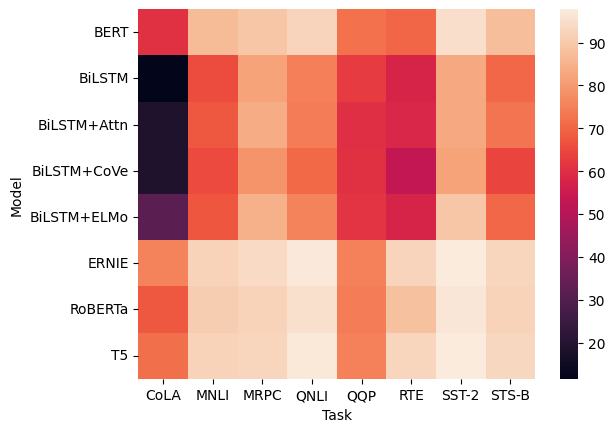

In [7]:
import seaborn as sns
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)

/var/folders/10/8lp40z8x2hj_cch9j4rk_cpm0000gs/T/ipykernel_39077/2516911723.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gluex = pd.read_json(glue.to_json())


<Axes: >

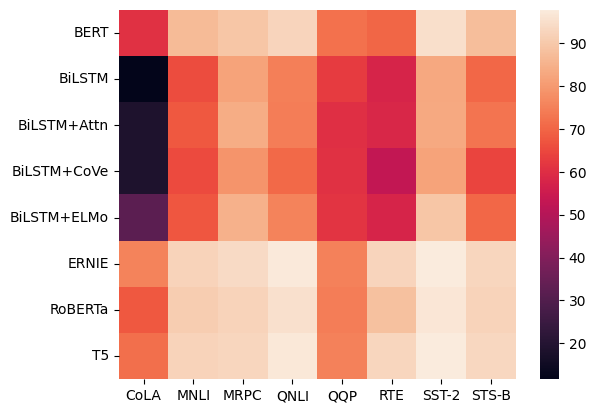

In [31]:
glue.to_json()
gluex = pd.read_json(glue.to_json())
sns.heatmap(gluex)

In [22]:
pd.read_csv(
    "Model,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B\nBERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6\nBiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3\nBiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8\nBiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4\nBiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3\nERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0\nRoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2\nT5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1\n"
)

OSError: [Errno 63] File name too long: 'Model,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B\nBERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6\nBiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3\nBiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8\nBiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4\nBiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3\nERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0\nRoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2\nT5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1\n'